**Githut for Data Science Competition:Titanic Machine Learning from Disaster**

In [1]:
URL= 'https://github.com/christophercyc/Titanic-Machine-Learning-from-Disaster-.git'

# Pre-import library for data analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, StratifiedKFold, learning_curve, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


from IPython.display import display
from IPython.display import display_html

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFECV
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)
    
# ignore warning
import warnings
warnings.filterwarnings("ignore")

train=pd.read_csv("dataset/train.csv")
test=pd.read_csv("dataset/test.csv")

# Data understanding

In [3]:
# Checking missing
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
# check statistic
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# Combine Train and Test data
data=train.append(test)
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [9]:
# Reset index
data.reset_index(inplace=True,drop=True)
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


'Survivrd:342   vs.    Not Survivrd:549'

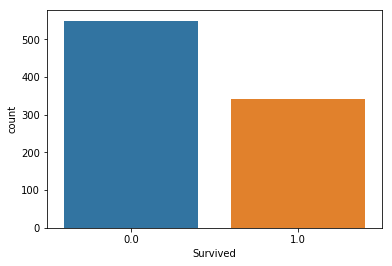

In [10]:
sns.countplot(data['Survived'])
data1='Survivrd:' + str(sum(data['Survived']==1)) +'   vs.    Not Survivrd:' + str(sum(data['Survived']==0))
data1

,Survived
Pclass,
1,0.630
2,0.473
3,0.242


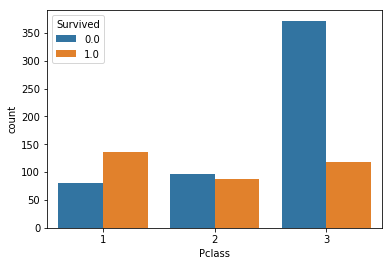

In [11]:
sns.countplot(data['Pclass'],hue=data['Survived'])
data[['Pclass','Survived']].groupby(['Pclass']).mean().round(3)

,Survived
Sex,
female,0.742
male,0.189


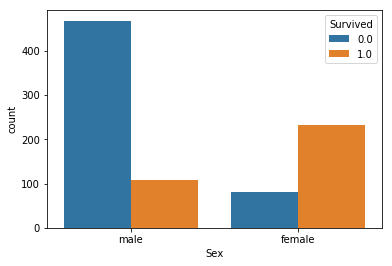

In [12]:
sns.countplot(data['Sex'],hue=data['Survived'])
data[['Sex','Survived']].groupby(['Sex']).mean().round(3)

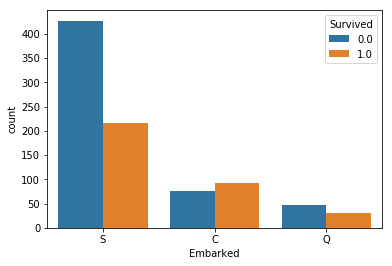

In [13]:
sns.countplot(data['Embarked'],hue=data['Survived'])

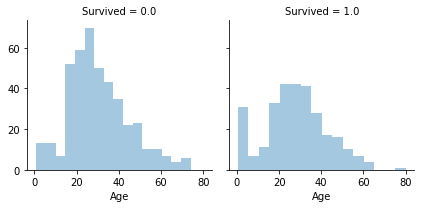

In [14]:
g=sns.FacetGrid(data,col='Survived')
g.map(sns.distplot,'Age',kde=False)

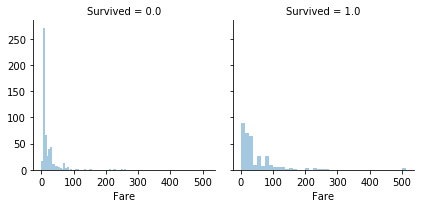

In [15]:
g=sns.FacetGrid(data,col='Survived')
g.map(sns.distplot,'Fare',kde=False)

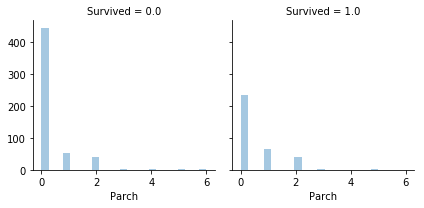

In [16]:
g=sns.FacetGrid(data,col='Survived')
g.map(sns.distplot,'Parch',kde=False)

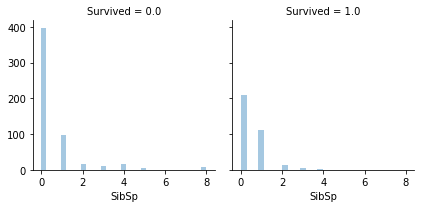

In [17]:
g=sns.FacetGrid(data,col='Survived')
g.map(sns.distplot,'SibSp',kde=False)

In [18]:
data['Family_Size'] = data['Parch'] + data['SibSp']

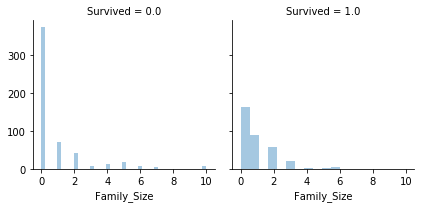

In [19]:
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Family_Size', kde=False)

In [20]:
#Feature Engineering
data['Title1']=data['Name'].str.split(",",expand=True)[1]

In [21]:
data['Name'].str.split(", ",expand=True).head(3)

,0,1
0,Braund,Mr. Owen Harris
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss. Laina


In [22]:
data['Title1'] = data['Title1'].str.split(".", expand=True)[0]


In [23]:
data['Title1'].head(3)

0       Mr
1      Mrs
2     Miss
Name: Title1, dtype: object

In [24]:
data['Title1'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer', ' Dona'], dtype=object)

In [25]:
pd.crosstab(data['Title1'],data['Sex']).T.style.background_gradient(cmap='summer_r')

Title1,Capt,Col,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Sex,,,,,,,,,,,,,,,,,,
female,0,0,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0,1
male,1,4,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1,0


In [26]:
pd.crosstab(data['Title1'],data['Survived']).T.style.background_gradient(cmap='summer_r')

Title1,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0.0,1,1,1,4,1,0,1,17,55,0,0,436,26,0,6,0,0
1.0,0,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1,1


In [27]:
data.groupby(['Title1'])['Age'].mean()

Title1
 Capt            70.000000
 Col             54.000000
 Don             40.000000
 Dona            39.000000
 Dr              43.571429
 Jonkheer        38.000000
 Lady            48.000000
 Major           48.500000
 Master           5.482642
 Miss            21.774238
 Mlle            24.000000
 Mme             24.000000
 Mr              32.252151
 Mrs             36.994118
 Ms              28.000000
 Rev             41.250000
 Sir             49.000000
 the Countess    33.000000
Name: Age, dtype: float64

In [28]:
data.groupby(['Title1','Pclass'])['Age'].mean()
# Can fit the missing age

Title1         Pclass
 Capt          1         70.000000
 Col           1         54.000000
 Don           1         40.000000
 Dona          1         39.000000
 Dr            1         45.600000
               2         38.500000
 Jonkheer      1         38.000000
 Lady          1         48.000000
 Major         1         48.500000
 Master        1          6.984000
               2          2.757273
               3          6.090000
 Miss          1         30.338983
               2         20.717083
               3         17.360874
 Mlle          1         24.000000
 Mme           1         24.000000
 Mr            1         41.450758
               2         32.346715
               3         28.318910
 Mrs           1         43.208955
               2         33.518519
               3         32.326531
 Ms            2         28.000000
               3               NaN
 Rev           2         41.250000
 Sir           1         49.000000
 the Countess  1         33.00000

In [29]:
#Replace the Title to 4 Type only 

data['Title2'] = data['Title1'].replace([' Mlle',' Mme',' Ms',' Dr',' Major',' Lady',' the Countess',' Jonkheer',' Col',' Rev',' Capt',' Sir',' Don',' Dona'],[' Miss',' Mrs',' Miss',' Mr',' Mr',' Mrs',' Mrs',' Mr',' Mr',' Mr',' Mr',' Mr',' Mr',' Mrs'])

In [30]:
data['Title2'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master'], dtype=object)

In [31]:
data.groupby('Title2')['Age'].mean()

Title2
 Master     5.482642
 Miss      21.824366
 Mr        32.811056
 Mrs       36.971264
Name: Age, dtype: float64

In [32]:
data.groupby(['Title2','Pclass'])['Age'].mean()

Title2   Pclass
 Master  1          6.984000
         2          2.757273
         3          6.090000
 Miss    1         30.131148
         2         20.865714
         3         17.360874
 Mr      1         42.241497
         2         32.914966
         3         28.318910
 Mrs     1         42.802817
         2         33.518519
         3         32.326531
Name: Age, dtype: float64

In [33]:
# Checking the Initials with the Sex
pd.crosstab(data['Title2'],data['Sex']).T.style.background_gradient(cmap='summer_r')

Title2,Master,Miss,Mr,Mrs
Sex,,,,
female,0,264,1,201
male,61,0,782,0


In [34]:
# Checking the Initials with the Survived
pd.crosstab(data['Title2'],data['Sex']).T.style.background_gradient(cmap='summer_r')

Title2,Master,Miss,Mr,Mrs
Sex,,,,
female,0,264,1,201
male,61,0,782,0


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Family_Size    1309 non-null int64
Title1         1309 non-null object
Title2         1309 non-null object
dtypes: float64(3), int64(5), object(7)
memory usage: 153.5+ KB


In [36]:
data['Ticket'].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [37]:
data['Ticket_info']=data['Ticket'].apply(lambda x : x.replace(".","").replace("/","").strip().split(' ')[0] if not x.isdigit() else 'X')

In [38]:
data['Ticket_info'].unique()

array(['A5', 'PC', 'STONO2', 'X', 'PP', 'CA', 'SCParis', 'SCA4', 'A4',
       'SP', 'SOC', 'WC', 'SOTONOQ', 'WEP', 'STONO', 'C', 'SCPARIS',
       'SOP', 'Fa', 'LINE', 'FCC', 'SWPP', 'SCOW', 'PPP', 'SC', 'SCAH',
       'AS', 'SOPP', 'FC', 'SOTONO2', 'CASOTON', 'SCA3', 'STONOQ', 'AQ4',
       'A', 'LP', 'AQ3'], dtype=object)

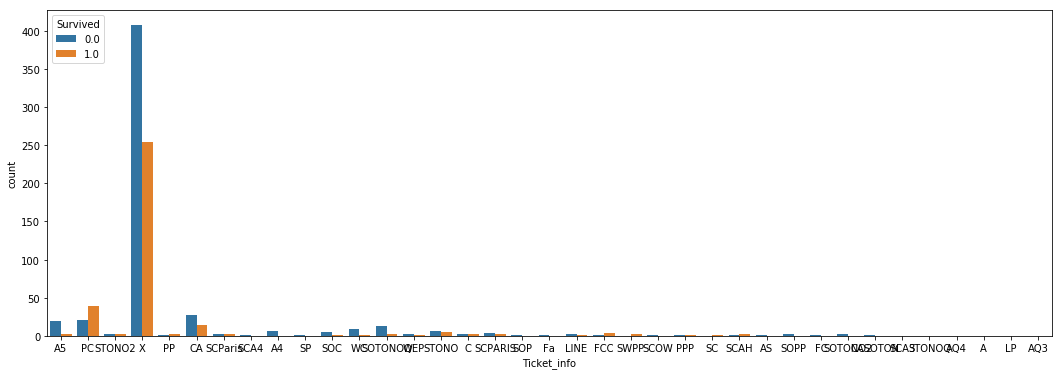

In [39]:
plt.figure(figsize=(18,6))
sns.countplot(data['Ticket_info'],hue=data['Survived'])

# Data Preparation

In [40]:
#Missing Value-embarked, Fare, Age
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Family_Size    1309 non-null int64
Title1         1309 non-null object
Title2         1309 non-null object
Ticket_info    1309 non-null object
dtypes: float64(3), int64(5), object(8)
memory usage: 163.7+ KB


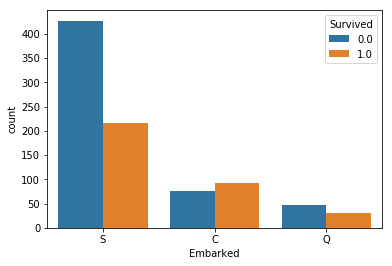

In [41]:
sns.countplot(data['Embarked'],hue=data['Survived'])

In [42]:
data['Embarked']=data['Embarked'].fillna('S')

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Family_Size    1309 non-null int64
Title1         1309 non-null object
Title2         1309 non-null object
Ticket_info    1309 non-null object
dtypes: float64(3), int64(5), object(8)
memory usage: 163.7+ KB


In [44]:
data['Fare']=data['Fare'].fillna(data['Fare'].mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Family_Size    1309 non-null int64
Title1         1309 non-null object
Title2         1309 non-null object
Ticket_info    1309 non-null object
dtypes: float64(3), int64(5), object(8)
memory usage: 163.7+ KB


In [45]:
data['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [46]:
data['Cabin']=data['Cabin'].apply(lambda x: str(x)[0] if not pd.isnull(x)else 'NoCabin')

In [47]:
data['Cabin'].unique()

array(['NoCabin', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

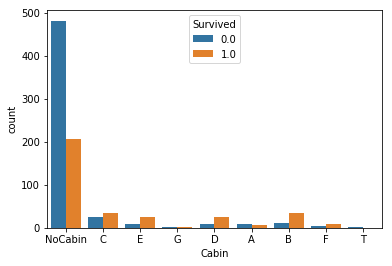

In [48]:
sns.countplot(data['Cabin'],hue=data['Survived'])

In [49]:
data['Title2'] = data['Title1'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','the Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],['Miss','Mrs','Miss','Mr','Mr','Mrs','Mrs','Mr','Mr','Mr','Mr','Mr','Mr','Mrs'])
data['Title2'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer', ' Dona'], dtype=object)

In [50]:
data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [51]:
#Feature Engineering for the same ticket family or friends
data['Connected_Survival']=0.5 # default

for _,df_grp in data.groupby('Ticket'):
    if(len(df_grp)>1):
        for ind,row in df_grp.iterrows():
            smax=df_grp.drop(ind)['Survived'].max()
            smin=df_grp.drop(ind)['Survived'].min()
            passID=row['PassengerId']
            if(smax==1.0):
                data.loc[data['PassengerId']==passID,'Connected_Survival']=1
            elif(smin==0.0):
                data.loc[data['PassengerId']==passID,'Connected_Survival']=0



    
#print
#print('people keep the same ticket: %.0f '%len(deplcate_ticket))
print("people have connected information : %.0f"
      %(data[data['Connected_Survival']!=0.5].shape[0]))
data.groupby('Connected_Survival')[['Survived']].mean().round(3)

people have connected information : 496


,Survived
Connected_Survival,
0.0,0.225
0.5,0.298
1.0,0.728


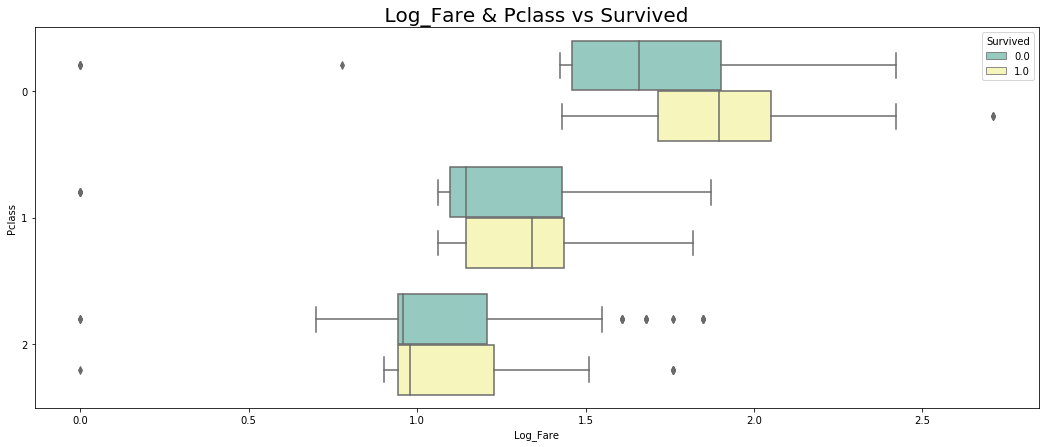

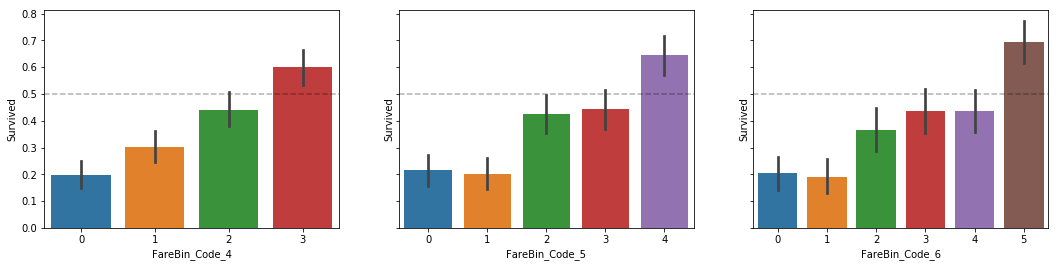

In [52]:
data['Sex']=data['Sex'].astype('category').cat.codes
data['Embarked']=data['Embarked'].astype('category').cat.codes
data['Pclass']=data['Pclass'].astype('category').cat.codes
data['Title1']=data['Title1'].astype('category').cat.codes
data['Title2']=data['Title2'].astype('category').cat.codes
data['Cabin']=data['Cabin'].astype('category').cat.codes
data['Ticket_info']=data['Ticket_info'].astype('category').cat.codes



# there is some bugs in log-scale of boxplot. 
# alternatively, we transform x into log10(x) for visualization.
fig, ax = plt.subplots( figsize = (18,7) )
data['Log_Fare'] = (data['Fare']+1).map(lambda x : np.log10(x) if x > 0 else 0)
sns.boxplot(y='Pclass', x='Log_Fare',hue='Survived',data=data, orient='h'
                ,ax=ax,palette="Set3")
ax.set_title(' Log_Fare & Pclass vs Survived ',fontsize = 20)
pd.pivot_table(data,values = ['Fare'], index = ['Pclass'], columns= ['Survived'] ,aggfunc = 'median' ).round(3)


# Filling missing values
# data['Fare'] = data['Fare'].fillna(data['Fare'].median())

# Making Bins
data['FareBin_4'] = pd.qcut(data['Fare'], 4)
data['FareBin_5'] = pd.qcut(data['Fare'], 5)
data['FareBin_6'] = pd.qcut(data['Fare'], 6)

label = LabelEncoder()
data['FareBin_Code_4'] = label.fit_transform(data['FareBin_4'])
data['FareBin_Code_5'] = label.fit_transform(data['FareBin_5'])
data['FareBin_Code_6'] = label.fit_transform(data['FareBin_6'])

# cross tab
df_4 = pd.crosstab(data['FareBin_Code_4'],data['Pclass'])
df_5 = pd.crosstab(data['FareBin_Code_5'],data['Pclass'])
df_6 = pd.crosstab(data['FareBin_Code_6'],data['Pclass'])

#display_side_by_side(df_4,df_5,df_6)

# plots
fig, [ax1, ax2, ax3] = plt.subplots(1, 3,sharey=True)
fig.set_figwidth(18)
for axi in [ax1, ax2, ax3]:
    axi.axhline(0.5,linestyle='dashed', c='black',alpha = .3)
g1 = sns.factorplot(x='FareBin_Code_4', y="Survived", data=data,kind='bar',ax=ax1)
g2 = sns.factorplot(x='FareBin_Code_5', y="Survived", data=data,kind='bar',ax=ax2)
g3 = sns.factorplot(x='FareBin_Code_6', y="Survived", data=data,kind='bar',ax=ax3)
# close FacetGrid object
plt.close(g1.fig)
plt.close(g2.fig)
plt.close(g3.fig)


In [53]:
dataAgeNull = data[data["Age"].isnull()]
dataAgeNotNull = data[data["Age"].notnull()]
remove_outlier = dataAgeNotNull[(np.abs(dataAgeNotNull["Fare"]-dataAgeNotNull["Fare"].mean())>(4*dataAgeNotNull["Fare"].std()))|
                      (np.abs(dataAgeNotNull["Family_Size"]-dataAgeNotNull["Family_Size"].mean())>(4*dataAgeNotNull["Family_Size"].std()))                     
                     ]
rfModel_age = RandomForestRegressor(n_estimators=2000,random_state=42)
ageColumns = ['Embarked', 'Fare', 'Pclass', 'Sex', 'Family_Size', 'Title1', 'Title2','Cabin','Ticket_info']
rfModel_age.fit(remove_outlier[ageColumns], remove_outlier["Age"])

ageNullValues = rfModel_age.predict(X= dataAgeNull[ageColumns])
dataAgeNull.loc[:,"Age"] = ageNullValues
data = dataAgeNull.append(dataAgeNotNull)
data.reset_index(inplace=True, drop=True)


In [54]:
data['Ti_Age']=data['Age']
data['Ti_Minor'] = ((data['Ti_Age']) < 16.0) * 1
data['Ti_Minor'].unique()

array([0, 1])

# Modeling

In [55]:
dataTrain = data[pd.notnull(data['Survived'])].sort_values(by=["PassengerId"])
dataTest = data[~pd.notnull(data['Survived'])].sort_values(by=["PassengerId"])
dataTrain.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Family_Size', 'Title1',
       'Title2', 'Ticket_info', 'Connected_Survival', 'Log_Fare', 'FareBin_4',
       'FareBin_5', 'FareBin_6', 'FareBin_Code_4', 'FareBin_Code_5',
       'FareBin_Code_6', 'Ti_Age', 'Ti_Minor'],
      dtype='object')

In [56]:
dataTrain = dataTrain[['Survived','Connected_Survival', 'Ti_Minor',  'FareBin_Code_5',  'Pclass', 'Sex','Title2']]
dataTest = dataTest[['Connected_Survival','Ti_Minor', 'FareBin_Code_5', 'Pclass', 'Sex', 'Title2']]
dataTrain.head()


,Survived,Connected_Survival,Ti_Minor,FareBin_Code_5,Pclass,Sex,Title2
263,0.0,0.5,0,0,2,1,12
264,1.0,0.5,0,4,0,0,13
265,1.0,0.5,0,1,2,0,9
266,1.0,0.0,0,4,0,0,13
267,0.0,0.5,0,1,2,1,12


In [57]:
x_train=dataTrain.iloc[:, 1:]
y_train=dataTrain.iloc[:, 0]

In [59]:
# RandomForest Model training 
rf = RandomForestClassifier(oob_score=True, random_state=1, n_jobs=-1)
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10, 12, 16, 20], "n_estimators": [50, 100, 400, 700, 1000]}
gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

gs = gs.fit(x_train, y_train)

print(gs.best_score_)
print(gs.best_params_)

0.8439955106621774
{'criterion': 'gini', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 50}


In [60]:
 
rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=50,
                             min_samples_split=2,
                             min_samples_leaf=5,
                             oob_score=True,
                             random_state=40,
                             n_jobs=-1) 

rf.fit(x_train, y_train)
print('The accuracy of eXtreme Gradient Boosting Classifier on training set:',rf.oob_score_)


The accuracy of eXtreme Gradient Boosting Classifier on training set: 0.8462401795735129


In [61]:
pd.concat((pd.DataFrame(dataTrain.iloc[:, 1:].columns, columns = ['variable']), 
           pd.DataFrame(rf.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]

,variable,importance
4,Sex,0.398163
0,Connected_Survival,0.211250
5,Title2,0.154180
3,Pclass,0.126078
2,FareBin_Code_5,0.089401
1,Ti_Minor,0.020927


In [62]:
# Xgboot Model training 
xgbc = XGBClassifier(base_score=0.5, 
                     booster='gbtree', 
                     colsample_bylevel=1,
                     colsample_bytree=1, 
                     gamma=0, 
                     learning_rate=0.1, 
                     max_delta_step=0,
                     max_depth=3, 
                     min_child_weight=1, 
                     missing=None, 
                     n_estimators=500,
                     n_jobs=3, nthread=None, objective='binary:logistic', random_state=42,
                     reg_alpha=0, 
                     reg_lambda=1, 
                     scale_pos_weight=1, 
                     seed=None,
                     silent=True, 
                     subsample=1)


xgbc.fit(dataTrain.iloc[:, 1:], dataTrain.iloc[:, 0])
print('The accuracy of eXtreme Gradient Boosting Classifier on training set:', xgbc.score(dataTrain.iloc[:, 1:], dataTrain.iloc[:, 0]))


The accuracy of eXtreme Gradient Boosting Classifier on training set: 0.8608305274971941


# Evaluation

In [63]:
print('The accuracy of Random Forest Classifier on training set:',rf.oob_score_)
print('The accuracy of eXtreme Gradient Boosting Classifier on training set:', xgbc.score(dataTrain.iloc[:, 1:], dataTrain.iloc[:, 0]))

The accuracy of Random Forest Classifier on training set: 0.8462401795735129
The accuracy of eXtreme Gradient Boosting Classifier on training set: 0.8608305274971941


# Deployment

In [64]:
rf_res =  xgbc.predict(dataTest)
submit['Survived'] = rf_res
submit['Survived'] = submit['Survived'].astype(int)
submit.to_csv('submit.csv', index= False)

submit.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
